In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Moving Beyond Linearity</center></h1>

Lineaer models have its limitations in terms of predictive power. Linear models can be extended simply as:

 - <b>Polynomial regression</b> extends linear regression by adding extra higher order predictors (predictors rasied to higher order powers).
 
 
 - <b>Step functions</b> cut the range of a variable into $K$ distinct regions in order to produce a qualitative variable.
 
 
 - <b>Regression splines</b> is the extension of polynomial regression and step functions. It divides the range of predictor $X$ into $K$ distinct regions and within each region a polynomial function is fit to the data.
 
 
 - <b>Smoothing splines</b>
 
 
 - <b>Local regression</b>
 
  
 - <b>Generalized additive models</b>
  

### 7.1 Polynomial Regression

A standard linear regression model

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

can be replaced by a more generic polynomial function

$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + ... + \beta_d x_i^d + \epsilon_i$$

This approach is known as <b>polynomial regression</b> and for large enough values of $d$, it can produce a highly non-linear curve. It is highly unusual to use $d$ greater than 3 or 4. The given model parameters can easily be estimated using linear least squares linear regression procedure. Similarly, polynomial functions can be modeled with the <b>logistic regression</b> as well. 

### 7.2 Step Functions

Polynomial regression gives a fit that is more <b>global</b> in nature. In <b>step functions</b>, we divide the range of $X$ into <b>bins</b> and fit a different constant in each bin. We can create $K$ <b>cutpoints</b> $c_1, c_2, ..., c_K$ in the range of $X$, and then can construct $K+1$ new <b>categorical</b> variables as:

$$C_i(X) = I(c_i \leq X < c_{i+1})$$

where $I(.)$ is an <b>indicator function</b> which returns 1 if the condition is true and 0 oterwise. For any value of $X$, $C_0(X) + C_1(X) + ... + C_K(X) = 1$, as only one value will be 1 for each $X$. We can then fit a linear least squares model to fit $C_1(X), C_2(X),...,C_K(X)$ as predictors. We need to omit one predictor as there will be intarcept too. The linear model is given as:

$$y_i = \beta_0 + \beta_1 C_1(x_i) + \beta_2 C_2(x_i) + ... + \beta_K C_K(x_i) + \epsilon_i$$

$\beta_0$ is a response for $X<c_1$. The response for $c_j \leq X < c_{j+1}$ is $\beta_0 + \beta_j$. Hence, $\beta_j$ represents the average increase in the response for $X$ in $c_j \leq X < c_{j+1}$ relative to $X < c_1$. Logistic regression model can be fitted in the same way.

### 7.3 Basis Functions

Polynomial and piecewise-constant regression models are special cases of a <b>basis function</b> approach for regression. In basis function approach, we use a family of functions to transform $X$ and instead of fitting a linear model in $X$, we fit the transformed predictors as:

$$y_i = \beta_0 + \beta_1 b_1(x_i) + \beta_2 b_2(x_i) + ... + \beta_K b_K(x_i) + \epsilon_i$$

The basis functions are fixed and known. For polynomial regression, the basis functions are $b_j(x_i) = x_i^j$. For piecewise constant functions, they are $b_j(x_i) = I(c_j \leq x_i < c_{j+1})$. As in basis functions approach linear model is fitted on the transformed variables, all the inference tools for linear models can be used.

### 7.4 Regression Splines

Regression splines are flixible class of basis functions that extend upon polynomial and piecewise constant regression approaches.

#### 7.4.1 Piecewise Polynomials

<b>Piecewise polynomial regression</b> fits separate low-degree polynomials over different regions of $X$. For example, a piecewise squared polynomial fits squared regression model of the form

$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$$

where the coefficients $\beta_0, \beta_1, \beta_2$ differs in different parts of the range of $X$. The points where the coefficients change are called <b>knots</b>. Each of the polynomial functions can be fit using least square methods. Increasing the number of knots will give a more flexible piecewise polynomial.

#### 7.4.2 Constraints and Splines

By using piecewise polynomial regression, the fitted curve on the data may have a <b>discontinuity at the knots</b> or we can say that the fitted curve is too flexible. Instead, we can fit a piecewise polynomial under the constraint that the fitted curve must be continuous. We can further add more constraints, such as, both the first and second derivatives of the piecewise polynomials must be continuous. <b>Each added constraint frees up one degree of freedom. and hence reducing the complexity of the resulting piecewise polynomial fit</b>. Hence by imposing three constraints of continuity, continuity of the first and second derivative, we reduce the degree of freedom of model by 3.

A piecewise cubic polynomial function with three constraints(continuity, continuity of the first and second derivative) is called as <b>cubic spline</b>. The degree of freedom of cubic spline is $K+4$, where $K$ is the <b>number of knots</b>. It can be explained as: The left(or right) end of the polynomial has a degree of freedom 4(as we have to estimate 4 coefficients or parameters to fit a cubic spline). Each additional knot adds one parameter (as three imposed constraints leave one free parameter) and hence making a total of $K+4$ parameters for $K$ knots. In general, a <b>degree-d spline</b> is a piecewise degree-d polynomial with continuity in derivatives upto degree $d-1$ at each knot.

#### 7.4.3 The Spline Basis Representation

A cubic spline with $K$ knots can be modeled as:

$$y_i = \beta_0 + \beta_1 b_1(x_i) + \beta_2 b_2(x_i) + ... + \beta_{K+3} b_{K+3}(x_i) + \epsilon_i$$

First of all, the equation can be interpreted as: the degree of freedom of a cubic spline is $K+4$ and hence we have to estimate $K+4$ parameters. After composing the equation, we need to formulate the <b>basis functions</b> $b_1, b_2, ..., b_{K+3}$. As explained above, a cubic spline can be iterpreted as a polynomial function where left(or right) end has a degree of freedom 4 (as we need to fit a cubic polynomial without any constraint) giving the first three basis functions as $x, x^2$ and $x^3$. Then we have to add one degree of freedom (parameter) per knot, with the constraints of continuity and continuity of the first and second derivatives. This behaviour can be captured by adding one <b>truncated power basis function</b> per knot, which is given as:

$$
\begin{equation}
  h(x, \xi) = (x - \xi)^3_+ = \left\{
  \begin{array}{@{}ll@{}}
    y(x - \xi)^3, & \text{if}\ x > \xi \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation}
$$

where $\xi$ is the knot. Adding $\beta_ih(x, \xi)$ will lead to discontinuity only in the third derivative at $\xi$. Hence to fit a cubic spline to a data set with $K$ knots, we need to perform least squares regression to estimate an intercept and $3+K$ parameters for $X, X^2, h(X, \xi_1), h(X, \xi_2), ..., h(X, \xi_K)$, where $\xi_1, \xi_2, ..., \xi_K$ are the knots.

Cubic splines have higher variance at the ends. A <b>natural spline</b> adds additional <b>boundary constraints</b>(requirement of being linear at boundaries, reducing 2 degree of freedom at each boundary) and hence reduce the variance, producing more stable estimates at boundaries.

#### 7.4.4 Choosing the Number and Locations of the Knots

The regression spline is most flexible in the regions which have highest number of knots. One approach is to place higher number of knots in the regions where we feel that the function might vary the most. In practice, it is common to place knots in a uniform fashion. The number of knots can be decided by analyzing the curve visually or by cross-validation.

#### 7.4.5 Comparison to Polynomial Regression

Regression splines give better results as compared to polynomial regression. Regression splines increase the fliexibility of the model by increasing the number of knots. As we increase the number of knots, we can place more knots in the regions where the function $f$ seems to change rapidly and fewer knots in the regions where it is stable. In polynomial regression, to increase the flexibility, we need to increase the degree of the polynomial. It may result in unstability and overfitting.

### 7.5 Smoothing Splines

#### 7.5.1 An Overview of Smoothing Splines

Regression splines are created by specifying a set of knots, producing a sequence of basis functions and then estimate spline coefficients using least squares.

To fit a smooth curve to a data set, we need to find a function $g(x)$ such that $RSS = \sum_{i=1}^{n}(y_i - g(x_i))^2$ is minimum. If we do not put any constraint on $g(x)$, we can always find a function $g(x)$, which will make RSS 0. This function will be too flexible and will overfit the data. Hence, we need to find a function $g$ which makes RSS small and which is <b>smooth</b> as well.

One way to find such a smooth function is to minimize:

$$\sum_{i=1}^{n}(y_i - g(x_i))^2 + \lambda \int g^{''}(t)^2 dt$$

where $\lambda$ is a nonnegative <b>tuning parameter</b>. The function that minimizes this is called as <b>smoothing spline</b>. The first part is a <b>loss function</b> and the second term is a <b>penalty</b> part that penalizes the variability of $g$. The second derivative of a function measures its smootheness as it corresponds to the amount by which the slope of a curve is changing. Hence, the second term encourages $g$ to be smooth. Larger the value of $\lambda$, smoother the $g$ as well. When $\lambda = 0$, the given model will be very flexible and will interpolate the training data. For $\lambda \to \infty$, the model corresponds to simple <b>least squares linear regression</b>. In a nut-shell, $\lambda$ <b>controls the bias-variance trade-off of the smoothing spline</b>.

The function $g$ that minimizes above quantity is the <b>natural cubic spline</b>. It is a piecewise cubic polynomial with knots having continuous first and second derivative at them. It should also be linear in the region outside the extreme knots. The obtained natural cubic spline is the <b>shrunken</b> version (due to tuning parameter $\lambda$) of the one which is obtaind by basis function approach.

#### 7.5.2 Choosing the Smoothing Parameter λ

The tuning parameter $\lambda$ controls the flexibility of the smoothing spline, and hence the <b>effective degree of freedom</b>. As $\lambda$ increases from 0 to $\infty$, the effective degree of freedom ($df_{\lambda}$) decreases from $n$ to 2.

Generally, degree of freedom refers to the number of free parameters(coefficients) in a model. A smoothing spline has $n$ parameters and hence $n$ nominal degree of freedom, but these $n$ parameters are heavily constrained. This phenomenon is measured by the effective degree of freedom.

In fitting a smoothing spline, we do not need to select the number of knots as there will be a knot at each training observation. Our main concern is the choice of $\lambda$. One possible approach is to choose $\lambda$ by croos-validation. LOOCV can be computed very efficiently for smoothing splines. The way RSS is calculated is slightly different though and is given as:

$$RSS_{cv}(\lambda) = \sum_{i=1}^{n} (y_i - \widehat{g_{\lambda}}^{(-i)}(x_i))^2 = 
\sum_{i=1}^{n} \bigg[ \frac{y_i - \widehat{g_{\lambda}}(x_i)}{1- (S_{\lambda})_{ii}} \bigg] ^2$$ 

Here $\widehat{g_{\lambda}}^{(-i)}(x_i)$ indicates the fitted value of smoothing spline evaluated at $x_i$, where the model uses all the training observation except $x_i$ (according to the definition of LOOCV). $\widehat{g_{\lambda}}(x_i)$ indicates the fit at $x_i$ using all the training observations. The matrix $S_{\lambda}$ can be computed as:

$$\widehat{g_{\lambda}} = S_{\lambda}y$$

where, $\widehat{g_{\lambda}}$ is the fitted values for a particular value of $\lambda$ and $y$ is the response vector. Hence, the <b>RSS of LOOCV can be computed by just using $\widehat{g_{\lambda}}$, which is the original fit using the entire data set</b>, and hence efficiently. The effective degree of freedom for the smoothing spline is given as:

$$df_{\lambda} = \sum_{i=1}^{n} (S_{\lambda})_{ii}$$

### 7.6 Local Regression

<b>Local regression</b> comutes the fit at a target point $x_0$ using only the nearby training observstions. The algorithm for local regression is as follows:

 - Gather the $k$ points closest to $x_0$.
 - Assign a weight $K_{i0} = K(x_i, x_0)$ to all the points in the neighborhood such that the points that are farthest have lower weights. All the points except from these $k$ nearest neighbors have weigth 0.
 - Fit a <b>weighted least squares regression</b> of the aformentioned points using weights, by finding $\beta_0, \beta_1$ that minimize
 
 $$\sum_{i=1}^{n}K_{i0}(y_i - \beta_0 - \beta_1 x_i)^2$$
 
 
 - The fitted value at $x_0$ is given as $\widehat{f}(x_0) = \widehat{\beta_0} + \widehat{\beta_1} x_0$.
 
The <b>span s</b> of a local regression is defined as $s = \frac{k}{n}$, where $n$ is total number of training samples. It plays the role of controling the flexibility of the non-linera fit. Smaller the value of $s$, the more local or wiggly is the fit. For larger values of $s$, we obtain a global fit. An appropriate value of $s$ can be chosen by cross-validation.

### 7.7 Generalized Additive Models

<b>Generalized additive models (GAMs)</b> predict $Y$ on the basis of $p$ predictors $X_1, X_2, ..., X_p$. This can be viewed as an extension of multiple linear regression.

#### 7.7.1 GAMs for Regression Problems

Multiple linear regression model can be given as:

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} + \epsilon_i$$

In order to incorporte a non-linear relationship between each feature and the response, each linear component can be replaced with a smooth non-linear function. The model can be expressed as:

$$y_i = \beta_0 + \sum_{j=1}^{p} f_{j}(x_{ij}) + \epsilon_i = \beta_0 + f_1(x_{i1}) + f_2(x_{i2}) + ... + f_p(x_{ip}) + \epsilon_i$$

This is an example of GAM. GAM is <b>additive</b> as we fit a separate non-linear model for each predictor and then add together their contributions. We can use any regression method to fit these individual models.

##### Pros and Cons of GAMs

 - As GAM models a non-linear relationship for each individual predictor, it will automatically capture the non-linear behaviour of the response.
 
 
 - As the model is additive, we can analyze the effect of each predictor on response by keeping other predictors constant.
 
 
 - The smoothness of each individual function can be summarized by its degree of freedom.
 
 
 - The main limitation of GAM is its additive nature. Due to this, the interaction between individual parameters is missed. However, we can manually add interaction terms (of the form $X_j \times X_k$) in GAM.
 
#### 7.7.2 GAMs for Classification Problems

For a qualitative variable $Y$, which takes on two values 0 and 1, the logistic regression model can be given as:

$$log\bigg( \frac{p(X)}{1-p(X)} \bigg) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p$$

where $p(X) = Pr(Y=1 | X)$ and the left hand side of the equation is called as <b>logit</b> or log of the odds. To accomodate non-linearity, above model can be modified as:

$$log\bigg( \frac{p(X)}{1-p(X)} \bigg) = \beta_0 + f_0(X_1) + f_2(X_2) + ... + f_p(X_p)$$

### 7.9 Exercises

#### Conceptual

Q1. It was mentioned in the chapter that a cubic regression spline with one knot at ξ can be obtained using a basis of the form $x, x^2, x^3, (x − ξ)^3_+$, where $(x − ξ)^3_+ = (x − ξ)^3$ if x > ξ and equals 0 otherwise.
We will now show that a function of the form $f(x) = β_0 + β_1x + β_2x^2 + β_3x^3 + β_4(x − ξ)^3_+$ is indeed a cubic regression spline, regardless of the values of $β_0, β_1, β_2, β_3, β_4$.

(a) Find a cubic polynomial 

$$f_1(x) = a_1 + b_1x + c_1x^2 + d_1x^3$$

such that $f(x) = f_1(x)$ for all x ≤ ξ. Express $a_1, b_1, c_1, d_1$ in terms of $β_0, β_1, β_2, β_3, β_4$.

<b>Sol:</b> When x ≤ ξ, $(x − ξ)^3_+$ is 0. Hence, $a_1 = \beta_0, b_1 = \beta_1, c_1 = \beta_2, d_1 = \beta_3$.

(b) Find a cubic polynomial 

$$f_2(x) = a_2 + b_2x + c_2x^2 + d_2x^3$$

such that $f(x) = f_2(x)$ for all x > ξ. Express $a_2, b_2, c_2, d_2$ in terms of $β_0, β_1, β_2, β_3, β_4$. We have now established that $f(x)$ is a piecewise polynomial.

<b>Sol:</b> Expanding $f(x)$ and comparing the coefficients, we get

$$a_2 = \beta_0 - \beta_4 \xi^3; b_2 = \beta_1 + 3\beta_4 \xi^2; c_2 = \beta_2 - 3\beta_4 \xi; d_2 = \beta_3 + \beta_4$$

(c) Show that $f_1(ξ) = f_2(ξ)$. That is, $f(x)$ is continuous at ξ.

<b>Sol:</b> Replacing $x=\xi$ in $f_1(x)$, we get

$$f_1(\xi) = β_0 + β_1 \xi + β_2 \xi^2 + β_3 \xi^3$$

Replacing $x=\xi$ in $f_2(x)$, we get

$$f_2(\xi) = a_2 + b_2 \xi + c_2 \xi^2 + d_2 \xi^3 = 
(\beta_0 - \beta_4 \xi^3) + (\beta_1 + 3\beta_4 \xi^2) \xi + (\beta_2 - 3\beta_4 \xi) \xi^2 + (\beta_3 + \beta_4) \xi^3 \\ 
= β_0 + β_1 \xi + β_2 \xi^2 + β_3 \xi^3$$

Hence $f(x)$ is continuous at $\xi$.

(d) Show that $f^{'}_1(ξ) = f^{'}_2(ξ)$. That is, $f^{'}(x)$ is continuous at ξ.

<b>Sol:</b> Taking derivatives of $f_1(x)$ and $f_2(x)$, we get

$$f^{'}_1(x) = b_1 + 2c_1x + 3d_1x^2 = \beta_1 + 2 \beta_2 x + 3 \beta_3 x^2 \\
f^{'}_2(x) = b_2 + 2c_2x + 3d_2x^2 = (\beta_1 + 3\beta_4 \xi^2) + 2(\beta_2 - 3\beta_4 \xi) x + 3(\beta_3 + \beta_4)x^2$$

Replacing $x = \xi$, we get

$$f^{'}_1(\xi) = \beta_1 + 2 \beta_2 \xi + 3 \beta_3 \xi^2 \\
f^{'}_2(\xi) = (\beta_1 + 3\beta_4 \xi^2) + 2(\beta_2 - 3\beta_4 \xi) \xi + 3(\beta_3 + \beta_4)\xi^2 = \beta_1 + 2 \beta_2 \xi + 3 \beta_3 \xi^2$$

Hence, $f^{'}(x)$ is continuous at ξ.

(e) Show that $f^{''}_1(ξ) = f^{''}_2(ξ)$. That is, $f^{''}(x)$ is continuous at ξ. Therefore, $f(x)$ is indeed a cubic spline.

<b>Sol:</b> Taking double derivatives of $f_1(x)$ and $f_2(x)$, we get

$$f^{''}_1(x) = 2c_1 + 6d_1x = 2 \beta_2 + 6 \beta_3 x \\
f^{''}_2(x) = 2c_2x + 6d_2x = 2(\beta_2 - 3\beta_4 \xi)  + 6(\beta_3 + \beta_4)x$$

Replacing $x = \xi$, we get

$$f^{''}_1(\xi) = 2 \beta_2 + 6 \beta_3 \xi \\
f^{''}_2(\xi) = 2(\beta_2 - 3\beta_4 \xi) + 6(\beta_3 + \beta_4)\xi = 2 \beta_2 + 6 \beta_3 \xi$$

Hence, $f^{''}(x)$ is continuous at ξ and therefore, $f(x)$ is a cubic spline.

Q2. Suppose that a curve $\widehat{g}$ is computed to smoothly fit a set of $n$ points using the following formula:

$$\widehat{g} = argmin_g \bigg( \sum_{i=1}^{n}(y_i - g(x_i))^2 + \lambda \int \bigg[g^{(m)}(x) \bigg]^2 dx \bigg)$$

where $g^{(m)}$ represents the $m$th derivative of $g$. Provide example sketches of $\widehat{g}$ in each of the following scenarios.

(a) λ = ∞, m = 0.

<b>Sol:</b> In this case $\widehat{g} = 0$, as due to large smoothing parameter, $g^{(0)}(x) \to 0$.

(b) λ = ∞, m = 1.

<b>Sol:</b> In this case $\widehat{g} = c$, as due to large smoothing parameter, $g^{(1)}(x) \to 0$.

(c) λ = ∞, m = 2.

<b>Sol:</b> In this case $\widehat{g} = cx + d$, as due to large smoothing parameter, $g^{(2)}(x) \to 0$.

(d) λ = ∞, m = 3.

<b>Sol:</b> In this case $\widehat{g} = cx^2 + dx + e$, as due to large smoothing parameter, $g^{(3)}(x) \to 0$.

(e) λ = 0, m = 3.

<b>Sol:</b> In this case $\widehat{g}$ will interpolate the data set, as due to $\lambda=0$, the smoothing will have no effect. 

Q3. Suppose we fit a curve with basis functions $b_1(X) = X, b_2(X) = (X − 1)^2I(X ≥ 1)$. (Note that I(X ≥ 1) equals 1 for X ≥ 1 and 0 otherwise.) We fit the linear regression model
 
$$Y = β_0 + β_1b_1(X) + β_2b_2(X) + \epsilon$$

and obtain coefficient estimates $β_0 = 1, β_1 = 1, β_2 = −2$. Sketch the estimated curve between X = −2 and X = 2. Note the intercepts, slopes, and other relevant information.

<b>Sol:</b> The estimated curve is of the form $1+X$ for $X<1$ and $1+X -2(X-1)^2$ for $X \geq 1$.

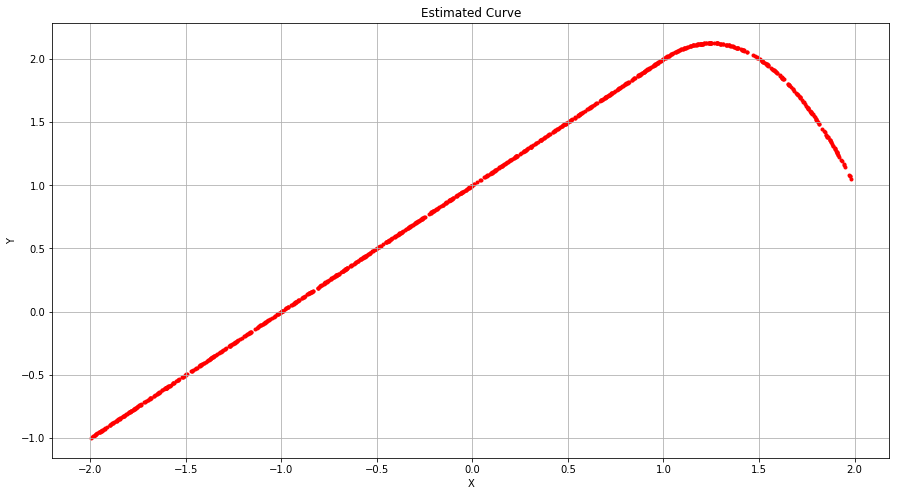

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def model(x):
    if x < 1:
        return 1+x
    else:
        return 1+x-2*((x-1)**2)
    
X = np.random.uniform(low=-2.0, high=2.0, size=1000)
vfunc = np.vectorize(model)
Y = vfunc(X)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.scatter(X, Y, marker=".", color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Estimated Curve')
plt.grid(b=True)
plt.show()

Q4. Suppose we fit a curve with basis functions $b_1(X) = I(0 ≤ X ≤ 2) − (X −1)I(1 ≤ X ≤ 2)$ and  $b2(X) = (X −3)I(3 ≤ X ≤ 4)+I(4 < X ≤ 5)$. We fit the linear regression model

$$Y = β_0 + β_1b_1(X) + β_2b_2(X) + \epsilon$$

and obtain coefficient estimates $β_0 = 1, β_1 = 1, β_2 = 3$. Sketch the estimated curve between X = −2 and X = 2. Note the intercepts, slopes, and other relevant information.

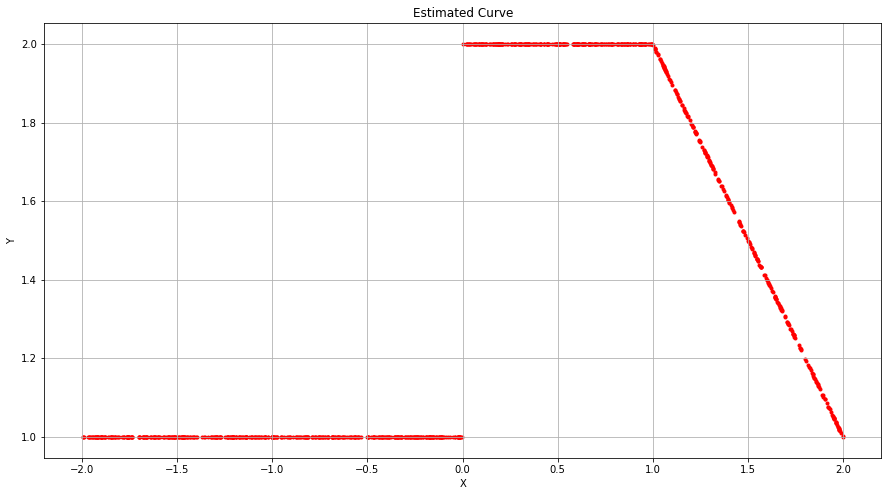

In [8]:
def model(x):
    if x < 0:
        return 1.0
    elif x < 1:
        return 2.0
    else:
        return 3-x
    
X = np.random.uniform(low=-2.0, high=2.0, size=1000)
vfunc = np.vectorize(model)
Y = vfunc(X)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.scatter(X, Y, marker=".", color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Estimated Curve')
plt.grid(b=True)
plt.show()

Q5. Consider two curves, $\widehat{g_1}$ and $\widehat{g_2}$, defined by

$$\widehat{g} = argmin_g \bigg( \sum_{i=1}^{n}(y_i - g(x_i))^2 + \lambda \int \bigg[g^{(3)}(x) \bigg]^2 dx \bigg)$$

$$\widehat{g} = argmin_g \bigg( \sum_{i=1}^{n}(y_i - g(x_i))^2 + \lambda \int \bigg[g^{(4)}(x) \bigg]^2 dx \bigg)$$

where $g^{(m)}$ represents the $m$th derivative of $g$.

(a) As λ → ∞, will $\widehat{g_1}$ or $\widehat{g_2}$ have the smaller training RSS?

<b>Sol:</b> As $g_2$ is more flexible (as it has higher order penalty term), its training RSS will be smaller.

(b) As λ → ∞, will $\widehat{g_1}$ or $\widehat{g_2}$ have the smaller test RSS?

<b>Sol:</b> The test RSS will depend on the distribution of test data. If we have to provide the behaviour of test RSS based on the nature of curve, $\widehat{g_2}$ will have more test RSS as it is more flexible and hence may overfit the data.

(c) For λ = 0, will $\widehat{g_1}$ or $\widehat{g_2}$ have the smaller training and test RSS?

<b>Sol:</b> For $\lambda = 0$, $\widehat{g_1} = \widehat{g_2}$, as the smoothing effect is 0. Hence, both will have the same training and test RSS.

#### Applied

Q6. In this exercise, you will further analyze the Wage data set considered throughout this chapter.

(a) Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.

<b>Sol:</b> The optimal degree of polynomial selected from cross-validation is <b>4</b>. From the ANOVA of models of degree 1 to 5, it is found that the models of degree 2 and 3 are significant. The test MSE shows the lowest value for degree 3 model as well.

In [9]:
import pandas as pd
import numpy as np

wage = pd.read_csv("data/Wage.csv")
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


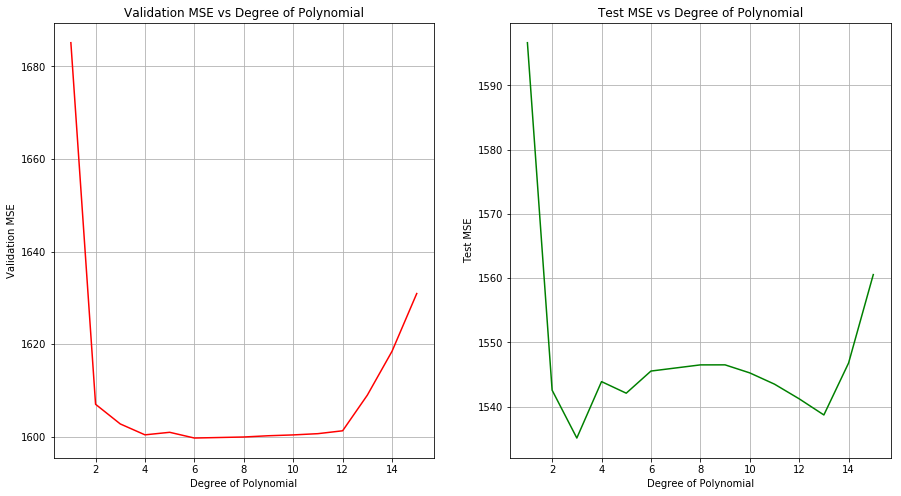

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(5)

def polynomial_regression(X_train, Y_train, X_test, Y_test, M):
    validation_MSE = {}
    test_MSE = {}
    
    for m in M:
        poly = preprocessing.PolynomialFeatures(degree=m)
        X_ = poly.fit_transform(X_train)
        
        mse = 0
        loo = LeaveOneOut() # Leave one out cross-validation
        for train_index, test_index in loo.split(X_):
            X, X_CV = X_[train_index], X_[test_index]
            Y, Y_CV = Y_train[train_index], Y_train[test_index]
            # Linear Regression (including higher order predictors)
            model = LinearRegression(fit_intercept=True)
            model.fit(X, Y)
            p = model.predict(X_CV)
            mse += mean_squared_error(p, Y_CV)
        validation_MSE[m] = mse/len(X_)
        
        # Compute test MSE for the model
        model = LinearRegression(fit_intercept=True)
        model.fit(X_, Y_train)
        p = model.predict(poly.fit_transform(X_test))
        test_MSE[m] = mean_squared_error(p, Y_test)
        
    # Plot validation MSE
    lists = sorted(validation_MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(121)
    plt.plot(x, y, color='r')
    plt.grid()
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('Validation MSE')
    ax.set_title('Validation MSE vs Degree of Polynomial')
    
    lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax = fig.add_subplot(122)
    plt.plot(x, y, color='g')
    plt.grid()
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('Test MSE')
    ax.set_title('Test MSE vs Degree of Polynomial')
    plt.show()
        
        
X_train, X_test, y_train, y_test = train_test_split(wage[['age']], wage[['wage']], test_size=0.1)
polynomial_regression(X_train, y_train.values, X_test, y_test, [1,2,3,4,5,6,8,9,10,11,12,13,14,15])

In [11]:
import statsmodels.api as sm

poly = preprocessing.PolynomialFeatures(degree=1)
X_ = poly.fit_transform(wage[['age']])
model1 = sm.OLS(wage[['wage']], X_)
model1 = model1.fit()

poly = preprocessing.PolynomialFeatures(degree=2)
X_ = poly.fit_transform(wage[['age']])
model2 = sm.OLS(wage[['wage']], X_)
model2 = model2.fit()

poly = preprocessing.PolynomialFeatures(degree=3)
X_ = poly.fit_transform(wage[['age']])
model3 = sm.OLS(wage[['wage']], X_)
model3 = model3.fit()

poly = preprocessing.PolynomialFeatures(degree=4)
X_ = poly.fit_transform(wage[['age']])
model4 = sm.OLS(wage[['wage']], X_)
model4 = model4.fit()

poly = preprocessing.PolynomialFeatures(degree=5)
X_ = poly.fit_transform(wage[['age']])
model5 = sm.OLS(wage[['wage']], X_)
model5 = model5.fit()

sm.stats.anova_lm(model1, model2, model3, model4, model5)

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


(b) Fit a step function to predict wage using age, and perform crossvalidation to choose the optimal number of cuts. Make a plot of the fit obtained. Code Source: https://rpubs.com/ppaquay/65563

In [12]:
%load_ext rpy2.ipython

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


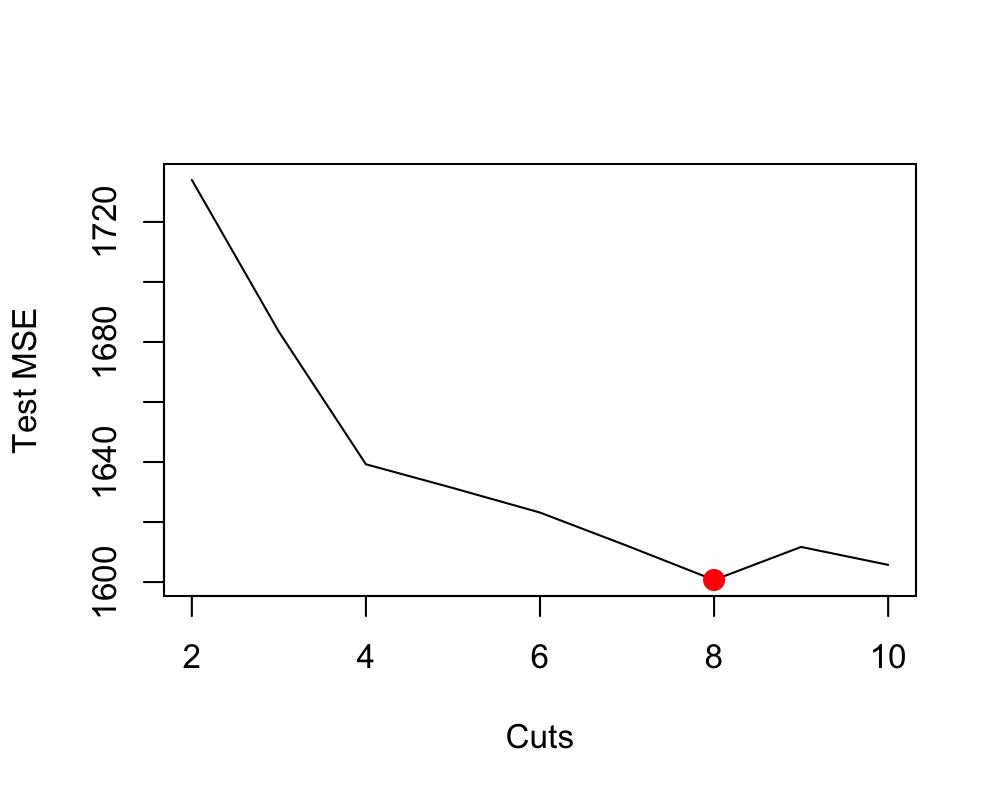

In [13]:
%%R -i wage -w 5 -h 4 --units in -r 200
library(boot)
set.seed(1)
cvs <- rep(NA, 10)
for (i in 2:10) {
    wage$age.cut <- cut(wage$age, i)
    fit <- glm(wage ~ age.cut, data = wage)
    cvs[i] <- cv.glm(wage, fit, K = 10)$delta[1]
}
plot(2:10, cvs[-1], xlab = "Cuts", ylab = "Test MSE", type = "l")
d.min <- which.min(cvs)
points(which.min(cvs), cvs[which.min(cvs)], col = "red", cex = 2, pch = 20)

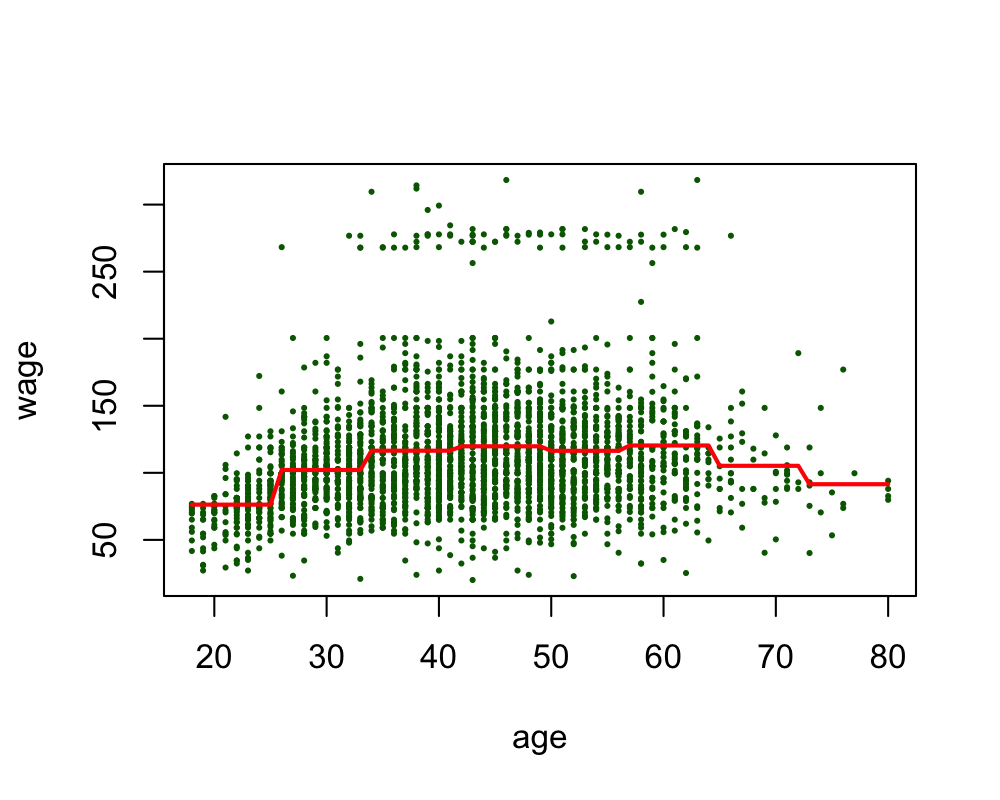

In [14]:
%%R -i wage -w 5 -h 4 --units in -r 200
plot(wage ~ age, data = wage, pch = 20, cex=0.4, col = "darkgreen")
agelims <- range(wage$age)
age.grid <- seq(from = agelims[1], to = agelims[2])
fit <- glm(wage ~ cut(age, 8), data = wage)
preds <- predict(fit, data.frame(age = age.grid))
lines(age.grid, preds, col = "red", lwd = 2)

Q9. This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

(a) Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [65]:
boston = pd.read_csv("data/Boston.csv")
boston.dropna(inplace=True)

In [66]:
poly = preprocessing.PolynomialFeatures(degree=3)
X_ = poly.fit_transform(boston[['dis']])
model = sm.OLS(boston[['nox']], X_)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Thu, 20 Sep 2018   Prob (F-statistic):          2.71e-136
Time:                        19:22:18   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9341      0.021     45.110      0.0

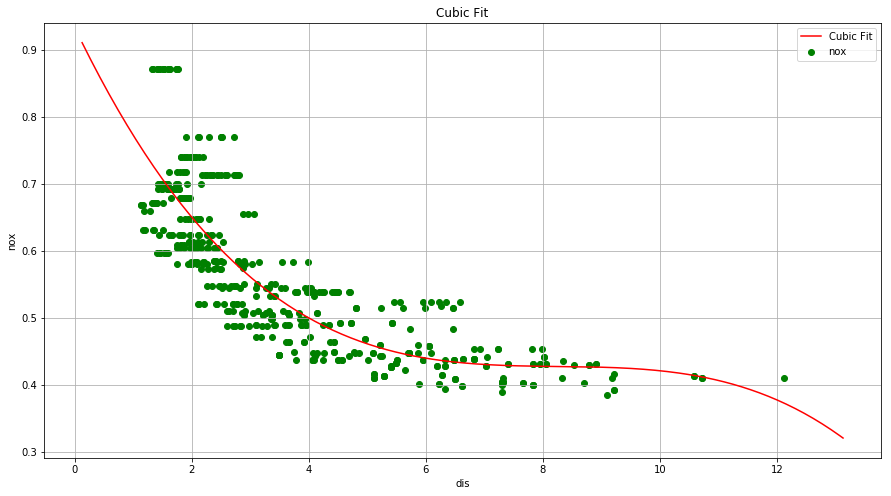

In [77]:
x = np.linspace(boston['dis'].min()-1, boston['dis'].max()+1, 256, endpoint = True)
y = result.params.const + result.params.x1*x + result.params.x2*(x**2) + result.params.x3*(x**3) 

fig = plt.figure(figsize=(15, 8))
plt.plot(x, y, 'red', label="Cubic Fit")
plt.scatter(boston['dis'], boston['nox'], alpha=1, color='green')

plt.xlabel('dis')
plt.ylabel('nox')
plt.title('Cubic Fit')
plt.legend(loc='best')

plt.grid()
plt.show()

(b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

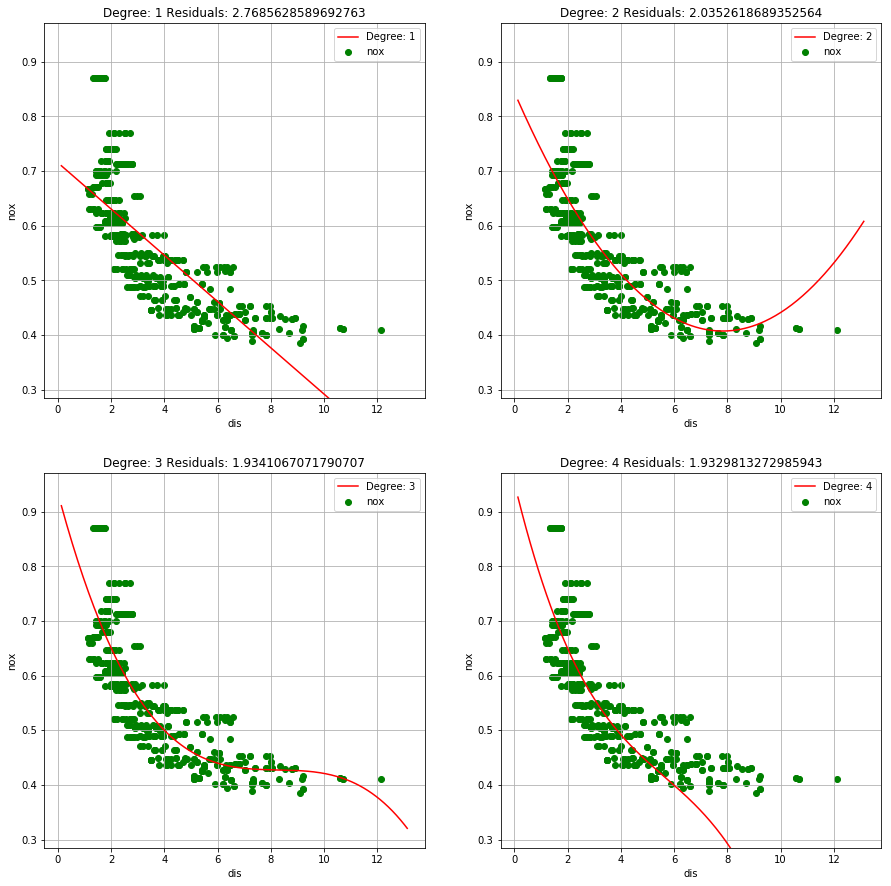

In [113]:
def add_polt(ax, x, y, RSS, degree):
    ax.plot(x, y, 'red', label="Degree: " +str(degree))
    ax.scatter(boston['dis'], boston['nox'], alpha=1, color='green')
    ax.set_ylim(boston['nox'].min()-0.1, boston['nox'].max()+0.1)
    ax.set_xlabel('dis')
    ax.set_ylabel('nox')
    ax.set_title('Degree: ' +str(degree) + ' Residuals: ' + str(RSS))
    ax.legend(loc='best')
    ax.grid()
    
fig = plt.figure(figsize=(15, 40))
x = np.linspace(boston['dis'].min()-1, boston['dis'].max()+1, 256, endpoint = True)

degree = 1
poly = preprocessing.PolynomialFeatures(degree=degree)
X_ = poly.fit_transform(boston[['dis']])
model = sm.OLS(boston[['nox']], X_)
result = model.fit()
y = result.params.const + result.params.x1*x
ax = fig.add_subplot(5, 2, degree)
add_polt(ax, x, y, result.ssr, degree)

degree = 2
poly = preprocessing.PolynomialFeatures(degree=degree)
X_ = poly.fit_transform(boston[['dis']])
model = sm.OLS(boston[['nox']], X_)
result = model.fit()
y = result.params.const + result.params.x1*x + result.params.x2*(x**2)
ax = fig.add_subplot(5, 2, degree)
add_polt(ax, x, y, result.ssr, degree)

degree = 3
poly = preprocessing.PolynomialFeatures(degree=degree)
X_ = poly.fit_transform(boston[['dis']])
model = sm.OLS(boston[['nox']], X_)
result = model.fit()
y = result.params.const + result.params.x1*x + result.params.x2*(x**2) + result.params.x3*(x**3)
ax = fig.add_subplot(5, 2, degree)
add_polt(ax, x, y, result.ssr, degree)

degree = 4
poly = preprocessing.PolynomialFeatures(degree=degree)
X_ = poly.fit_transform(boston[['dis']])
model = sm.OLS(boston[['nox']], X_)
result = model.fit()
y = result.params.const + result.params.x1*x + result.params.x2*(x**2) + result.params.x3*(x**3) 
+ result.params.x4*(x**4)
ax = fig.add_subplot(5, 2, degree)
add_polt(ax, x, y, result.ssr, degree)

plt.show()

(c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

<b>Sol:</b> The optimal degree of polynomial is <b>8</b>. Achieved test MSE at this value is decent as well.

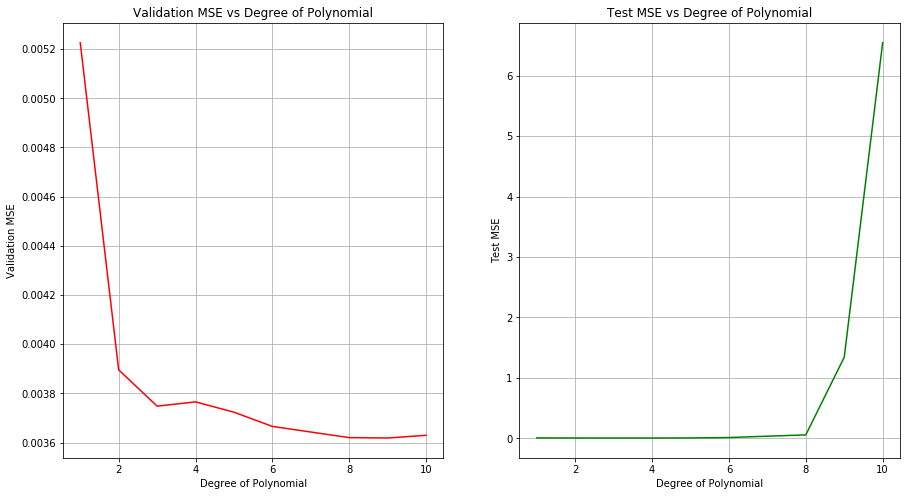

In [132]:
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(boston[['dis']], boston[['nox']], test_size=0.2)
polynomial_regression(X_train, y_train.values, X_test, y_test, [1,2,3,4,5,6,8,9,10])